In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# 1. Analyzing CommonVoice

1. For each language, determine the total duration of recording and the number of different
speakers.

In [2]:
all_recordings = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("*.tsv") if path.stem in {"train", "test"}])

list(Path("metadata").rglob("clip_durations.tsv"))
all_durations = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("clip_durations.tsv")])

df_all = pd.merge(all_recordings, all_durations, left_on="path", right_on="clip", validate="1:1")

C:\Users\eduss\AppData\Local\Temp\ipykernel_9380\3506451549.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  all_recordings = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("*.tsv") if path.stem in {"train", "test"}])


In [3]:
df_all.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]
0,0237f666c0b4f0779056b7c9289e40c170c6b0974b4214...,common_voice_ar_28865270.mp3,زارني في أوائل الشهر بدري,2,0,twenties,male,NaN,NaN,ar,NaN,common_voice_ar_28865270.mp3,4320
1,053a91dfd8c87629424edbb1a98cebea127137e6532174...,common_voice_ar_22931432.mp3,من الممكن أنها لن تأتي غداً.,2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_22931432.mp3,3936
2,073c6a4a1887384a1d6145a3258b7ca48de9f441c1762f...,common_voice_ar_26338992.mp3,إبنك بطل.,2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_26338992.mp3,3744
3,08ea1e4883b0112f794e6cba73552d702ba257721b88df...,common_voice_ar_35782277.mp3,جاء ذلك الغبيّ يبحث عنّي.,2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_35782277.mp3,4788
4,0aab971eac3eabea7027b19bedcde9f9bf1162f536326d...,common_voice_ar_25175528.mp3,الواعظ الأمرد هذا الذي,2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_25175528.mp3,3636


In [4]:
df_all.groupby(["locale"])["duration[ms]"].sum() / (1_000 * 60 * 60)

locale
ar         45.044454
de        928.265468
en       1715.244142
es        477.782980
fr        783.546716
id         11.823971
it        271.087065
ja         16.027343
lg        129.467263
ru         53.545282
sw         84.902540
ta         91.614787
tr         41.614813
zh-CN      59.765809
Name: duration[ms], dtype: float64

In [5]:
df_all.groupby(["locale"])["client_id"].nunique()

locale
ar         982
de       12277
en       47861
es       10990
fr       12153
id         332
it        5098
ja        1073
lg         514
ru        2144
sw         956
ta         471
tr        1268
zh-CN     3454
Name: client_id, dtype: int64

2. For each language and each genre determine the total duration of recordings, the number
of different speakers, the average, median, min and max number of recordings per speaker.

In [6]:
# total duration of recordings for each language and each gender
df_all.groupby(["locale", "gender"])["duration[ms]"].sum() / (1_000 * 60 * 60)


locale  gender
ar      female      7.402720
        male        9.886336
        other       0.041560
de      female     71.124555
        male      515.881075
        other       6.771279
en      female    336.605251
        male      823.686836
        other      36.568124
es      female    131.932416
        male      261.738724
        other       1.600193
fr      female     88.797867
        male      459.974952
        other       7.215213
id      female      2.577800
        male        4.588297
        other       0.027287
it      female     30.288395
        male      163.854398
        other       0.831827
ja      female      3.321960
        male        9.085747
        other       0.072753
lg      female     61.294959
        male       38.108293
ru      female      8.140450
        male       28.355696
        other       0.136490
sw      female     28.899690
        male       22.760620
ta      female     19.080223
        male       15.333890
tr      female     10.628443

In [7]:
# number of different speakers for each language and each gender
df_all.groupby(["locale", "gender"], dropna=False)["client_id"].nunique() #.plot(kind='bar')


locale  gender
ar      female       87
        male        301
        other         8
        NaN         671
de      female      576
        male       3111
        other        50
        NaN        9069
en      female     3177
        male      11394
        other       330
        NaN       34829
es      female     1095
        male       2775
        other        57
        NaN        7248
fr      female      784
        male       3096
        other        81
        NaN        8699
id      female       32
        male        118
        other         2
        NaN         199
it      female      274
        male       1193
        other         7
        NaN        3777
ja      female      187
        male        435
        other         9
        NaN         559
lg      female      174
        male        177
        NaN         262
ru      female      231
        male        650
        other         5
        NaN        1366
sw      female      226
        male        247
 

In [8]:
df_recordings_count = df_all.groupby(['locale', 'gender', 'client_id']).size().reset_index(name='recordings_count')
# average number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].mean()
# median number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].median()
# # min number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].min()
# # max number of recordings per speaker for each language and gender
#df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].max()


locale  gender
ar      female    1
        male      1
        other     1
de      female    1
        male      1
        other     1
en      female    1
        male      1
        other     1
es      female    1
        male      1
        other     1
fr      female    1
        male      1
        other     1
id      female    1
        male      1
        other     1
it      female    1
        male      1
        other     1
ja      female    1
        male      1
        other     3
lg      female    1
        male      1
ru      female    1
        male      1
        other     1
sw      female    1
        male      1
ta      female    1
        male      1
tr      female    1
        male      1
        other     4
zh-CN   female    1
        male      1
        other     1
Name: recordings_count, dtype: int64

3. Which language has the highest proportion of recordings by a person in the largest age
bracket considered ?

In [9]:
# determine the largest age bracket
print(df_all["age"].unique()) # -> nineties

df_all[df_all['age'] == 'nineties']\
          .groupby(['locale', 'client_id'])\
          .size()\
          .reset_index(name='recordings_count')\
          .assign(proportion=lambda x: x['recordings_count'] / x['recordings_count'].sum())\
          .sort_values(by='proportion', ascending=False)\
          .head(1)


['twenties' nan 'fourties' 'teens' 'thirties' 'sixties' 'fifties'
 'nineties' 'seventies' 'eighties']


,locale,client_id,recordings_count,proportion
13,lg,cb684886da071f9271fa154a6228cb11474bdceab3ecdf...,352,0.550861


4. Determine the number of different genres considered in the corpus. What is the percentage of recordings for which no genre information is available ?
 Plot the genre distribution (including cases where gender information is not available). Do the same for ages.

number of different genders considered in the corpus:  3
percentage of recordings for which no genre information is available:  0.3021357937629108


<Axes: xlabel='gender'>

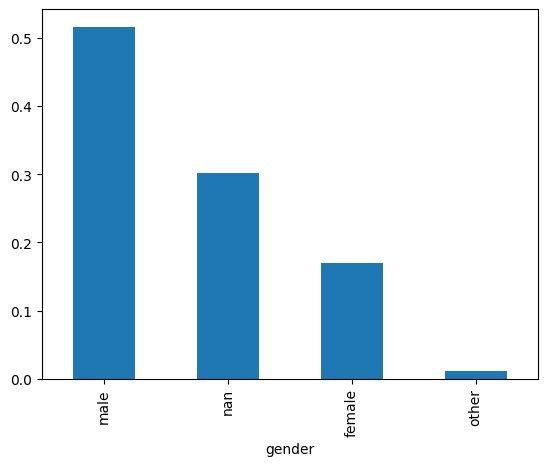

In [10]:
print("number of different genders considered in the corpus: ",df_all["gender"].nunique())

print("percentage of recordings for which no genre information is available: ", df_all["gender"].value_counts(dropna=False, normalize=True).get(np.nan))

# plot of gender distribution
df_all["gender"].value_counts(dropna=False, normalize=True).plot(kind='bar')

number of different age brackets considered in the corpus:  9
percentage of recordings for which no age information is available:  0.3174565742234736


<Axes: xlabel='age'>

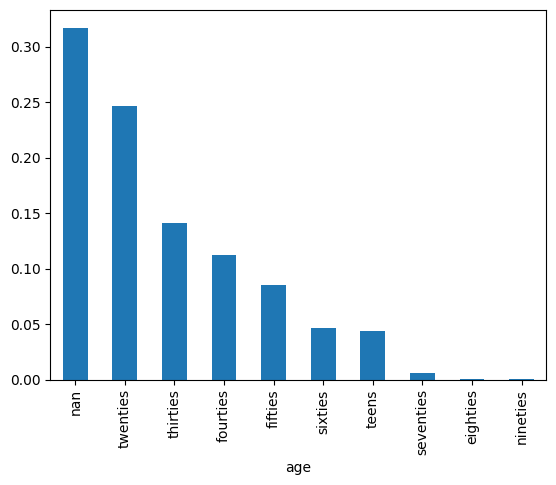

In [11]:
print("number of different age brackets considered in the corpus: ",df_all["age"].nunique())

print("percentage of recordings for which no age information is available: ", df_all["age"].value_counts(dropna=False, normalize=True).get(np.nan))

# plot of age distribution
df_all["age"].value_counts(dropna=False, normalize=True).plot(kind='bar')

5. Find out for each language and each genre the 7 speakers who produced the most recordings.

In [12]:
df_all.groupby(['locale', 'gender'])['client_id'].value_counts().reset_index(name='recordings_count')\
    .sort_values(by=['locale', 'gender', 'recordings_count'], ascending=[True, True, False])\
    .groupby(['locale', 'gender']).head(7)


,locale,gender,client_id,recordings_count
0,ar,female,78c954e30fd3a81e4abc72008b6c25427f6cb545275c59...,1286
1,ar,female,5f810213ca8e05e0d27a618d7a9e06c8ce4a2f4ca21eab...,1019
2,ar,female,fc3b87e39142b5fced5eb2422f0f5277bdf471c8865e9a...,526
3,ar,female,d7517b67ab736aa3e93a6ff78544e9f6e5be2540651522...,492
4,ar,female,c8a5a7e7ec79a0962b671878dc7de66774a4c7c58afb3a...,399
...,...,...,...,...
32115,zh-CN,other,8a2fc21b44d2c005616923c7997aac35e2d19e640b806c...,7
32116,zh-CN,other,b06ee136b9ab85349742e4bdb3d976d49ec971b37e0389...,4
32117,zh-CN,other,9bdbe9c49cc619513057e43ecb888570c176b6027fcf03...,3
32118,zh-CN,other,344489e9898b3cd9c5d29005768c95d2258e280dd9cff6...,1


6. For each language, create a 1-hour test set and a training set as large as possible, ensuring
that speakers from the test set do not appear in the training set.

In [13]:
train_test_sets = {}
for language in df_all["locale"].unique():
    df_by_language = df_all[(df_all["locale"] == language)]
    cumulated_duration_by_speaker = (df_by_language.groupby(["client_id"])["duration[ms]"].sum()).to_frame()
    cumulated_duration_by_speaker["cumulated_time"] = cumulated_duration_by_speaker["duration[ms]"].cumsum()
    cumulated_duration_by_speaker = cumulated_duration_by_speaker[cumulated_duration_by_speaker["cumulated_time"] < 3_600_000]
    merged = pd.merge(df_by_language, cumulated_duration_by_speaker, on='client_id', how='left', indicator=True)
    train_set = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
    test_set = merged[merged['_merge'] == 'both'].drop('_merge', axis=1)
    train_test_sets[language] = {'test set': test_set, 'train set': train_set}


train_test_sets['fr']['train set']#.to_csv("french_train_set.csv")

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]_x,duration[ms]_y,cumulated_time
0,00712edd26a2e44012180c1aa2f3f213e115b7bf34fa48...,common_voice_fr_19738183.mp3,Ce dernier a évolué tout au long de l'histoire...,2,0,NaN,NaN,NaN,NaN,fr,NaN,common_voice_fr_19738183.mp3,3816,NaN,NaN
1,0140a1c33ac215134f183e8c24a0b5f5e5dbf85b4c7464...,common_voice_fr_27024649.mp3,Son actionnaire majoritaire est le Conseil ter...,2,1,NaN,NaN,NaN,NaN,fr,NaN,common_voice_fr_27024649.mp3,6336,NaN,NaN
2,0174221e49c787eb39c0f8af02c17d09bb19f73daf70df...,common_voice_fr_19364697.mp3,Ce site contient quatre tombeaux de la dynasti...,2,0,NaN,NaN,NaN,NaN,fr,NaN,common_voice_fr_19364697.mp3,7128,NaN,NaN
3,01862eb52a1af6f61706bc9b24d9740c0e6872dc4738c2...,common_voice_fr_18027195.mp3,"J'ai dit que les acteurs de bois avaient, selo...",2,0,NaN,NaN,NaN,NaN,fr,NaN,common_voice_fr_18027195.mp3,6264,NaN,NaN
4,01f1a45008879e6fb43cc77591c2f0b92550b2c57a51e5...,common_voice_fr_23819902.mp3,Les Pays-Bas ont remporté toutes les éditions.,2,1,fifties,male,NaN,NaN,fr,NaN,common_voice_fr_23819902.mp3,3984,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543681,a7c881996f1d72a5bd09e3dcc8aa9994b83ec84a415925...,common_voice_fr_36819744.mp3,Alasdair Taylor est également sélectionné en t...,2,0,NaN,male,Français de France,NaN,fr,NaN,common_voice_fr_36819744.mp3,5976,NaN,NaN
543682,a7c881996f1d72a5bd09e3dcc8aa9994b83ec84a415925...,common_voice_fr_36819745.mp3,Cette fusion visait à renforcer les deux clubs...,2,0,NaN,male,Français de France,NaN,fr,NaN,common_voice_fr_36819745.mp3,6480,NaN,NaN
543683,a7c881996f1d72a5bd09e3dcc8aa9994b83ec84a415925...,common_voice_fr_38156727.mp3,"Désormais majeure, elle souhaite connaître les...",2,0,NaN,male,Français de France,NaN,fr,NaN,common_voice_fr_38156727.mp3,5472,NaN,NaN
543684,a7c881996f1d72a5bd09e3dcc8aa9994b83ec84a415925...,common_voice_fr_38156737.mp3,"Recouvrant la vue, celui-ci se ruait instantan...",2,0,NaN,male,Français de France,NaN,fr,NaN,common_voice_fr_38156737.mp3,7668,NaN,NaN


7. How many languages have more female than male recordings ?

In [14]:
gender_counts = df_all.groupby(['locale', 'gender'])['client_id'].count().unstack()
languages_with_more_females = len(gender_counts[gender_counts['female'] > gender_counts['male']])

print("Number of languages with more female than male recordings:", languages_with_more_females)

Number of languages with more female than male recordings: 3


8. Which language has the most unbalanced gender distribution ?

In [15]:
print("language with most unbalanced gender distribution:", abs(gender_counts["male"] - gender_counts["female"]).idxmax())

language with most unbalanced gender distribution: en


9. For each language, create a train set containing 1 hour of recordings and a 10-minute test
set so that : i) train and test are gender-balanced ii) the train and test speakers are different

In [16]:
train_test_sets = {}
for language in df_all["locale"].unique():
    df_by_language = df_all[(df_all["locale"] == language) & df_all["gender"].isin(['male', 'female'])]
    df_by_language["rank"] = df_by_language.groupby(["gender"]).cumcount()
    df_by_language = df_by_language.sort_values(['rank', 'client_id'])
    df_by_language['cumulated_time'] = df_by_language['duration[ms]'].cumsum()
    train_set = df_by_language[df_by_language["cumulated_time"] < 3_600_000]
    df_by_language = df_by_language[~ df_by_language["client_id"].isin(train_set["client_id"])]
    df_by_language['cumulated_time'] = df_by_language['duration[ms]'].cumsum()
    test_set = df_by_language[df_by_language["cumulated_time"] < 600_000]
    train_test_sets[language] = {'test set': test_set, 'train set': train_set}


train_test_sets['en']['test set']

C:\Users\eduss\AppData\Local\Temp\ipykernel_9380\2698546205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_language["rank"] = df_by_language.groupby(["gender"]).cumcount()
C:\Users\eduss\AppData\Local\Temp\ipykernel_9380\2698546205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_language["rank"] = df_by_language.groupby(["gender"]).cumcount()
C:\Users\eduss\AppData\Local\Temp\ipykernel_9380\2698546205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms],rank,cumulated_time
634571,94c84c69970de1ef08b1cf7a6ce6905755991561d80eb4...,common_voice_en_20586173.mp3,Contract was cancelled.,2,1,twenties,female,NaN,NaN,en,NaN,common_voice_en_20586173.mp3,5136,309,5136
625257,6826fa7d36a4867f80bdca265996ee4a954b63b1bd82d6...,common_voice_en_19533333.mp3,His father was a skilled melodeon player.,2,0,thirties,male,"India and South Asia (India, Pakistan, Sri Lanka)",NaN,en,NaN,common_voice_en_19533333.mp3,4824,310,9960
634572,94c84c69970de1ef08b1cf7a6ce6905755991561d80eb4...,common_voice_en_20586174.mp3,Sima Guang left the traditional usage in Chine...,2,1,twenties,female,NaN,NaN,en,NaN,common_voice_en_20586174.mp3,9816,310,19776
625266,6870856a6cf05cf6edf0685e02e2879774dbd90a5e02da...,common_voice_en_17802414.mp3,Did you see the chap over there with his arms ...,2,0,fourties,male,NaN,NaN,en,NaN,common_voice_en_17802414.mp3,5544,311,25320
634618,95da5e17fc81abef6ef1917e678e7b70072a52b2eb85ff...,common_voice_en_17821963.mp3,The fan whirled its round blades softly.,2,0,twenties,female,England English,NaN,en,NaN,common_voice_en_17821963.mp3,2616,311,27936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637107,d903bb19569a055a2df364a7bba3bc4fe2abdc02d908dc...,common_voice_en_31534149.mp3,Obtaining food outside of the rationing system...,2,0,twenties,female,NaN,NaN,en,NaN,common_voice_en_31534149.mp3,6300,358,574728
625660,79feeb11c5dbfebbccd021e58f0b6cdf536d69b2f8d1a7...,common_voice_en_17881800.mp3,"Security, kick this guy out!",2,0,twenties,male,United States English,NaN,en,NaN,common_voice_en_17881800.mp3,3672,359,578400
637108,d903bb19569a055a2df364a7bba3bc4fe2abdc02d908dc...,common_voice_en_31534152.mp3,Fisher led his Marines during four days of con...,2,0,twenties,female,NaN,NaN,en,NaN,common_voice_en_31534152.mp3,7308,359,585708
625664,7a39dd1ad05f4f8f08c23ab253d73228fbfcdde223efd2...,common_voice_en_18682280.mp3,Latimer is consistently assessed as having a l...,2,0,twenties,male,United States English,NaN,en,NaN,common_voice_en_18682280.mp3,6624,360,592332


10. Plot, for each language, a box plot representing the distribution of the number of words
per sentence. (use tokenizer from Moses or Polyglot.)

In [17]:
# from mosestokenizer import *

In [18]:
# import polyglot
# from polyglot.text import Text

In [19]:
import pandas as pd

In [20]:
subdf = df_all.sample(frac=0.1)

In [21]:
import polyglot
from polyglot.text import Text
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")
# try:
#     df_all = pd.read_csv('df_all.csv', sep='\t')
# except FileNotFoundError:

#tokenizer_lang = {language: MosesTokenizer(language) for language in df_all["locale"].unique()}
df_all["sentence"] = df_all["sentence"].apply(lambda x: Text(str(x).lower().replace('\n', '')).words)
#df_all.to_csv('df_all.csv', sep='\t')

In [22]:
# tokenized_words = []
# nb_words_in_sentence = []
# for language in df_all["locale"].unique():
#     #df_by_language = df_all[(df_all["locale"] == language)]
#     with MosesTokenizer(language) as tokenize:
#         #df_by_language["nb_words_in_sentence"] = [len(tokenize(str(sentence).replace('\n', ''))) for sentence in df_by_language["sentence"]]
#         # tokenized = [tokenize(str(sentence).replace('\n', '')) for sentence in df_all[df_all['locale'] == language]["sentence"]]
#         # tokenized_words.append([word for sublist in tokenized for word in sublist if word not in stop_words[language]])
#         #df_all[(df_all["locale"] == language)]["sentence"].apply(lambda x: tokenize(str(x).replace('\n', '')))
        
#         df_all.loc[df_all['locale'] == language, 'sentence'] = df_all[(df_all["locale"] == language)]["sentence"].apply(lambda x: tokenize(str(x).lower().replace('\n', '')))
#         #nb_words_in_sentence.append([len(tokenize(str(sentence).replace('\n', ''))) for sentence in df_all[(df_all["locale"] == language)]["sentence"]])  # len(sentence) for sentence in tokenized
#         #pd.merge(df_all, df_by_language, on="client_id")

In [23]:
df_all

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]
0,0237f666c0b4f0779056b7c9289e40c170c6b0974b4214...,common_voice_ar_28865270.mp3,"[زارني, في, أوائل, الشهر, بدري]",2,0,twenties,male,NaN,NaN,ar,NaN,common_voice_ar_28865270.mp3,4320
1,053a91dfd8c87629424edbb1a98cebea127137e6532174...,common_voice_ar_22931432.mp3,"[من, الممكن, أنها, لن, تأتي, غداً, .]",2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_22931432.mp3,3936
2,073c6a4a1887384a1d6145a3258b7ca48de9f441c1762f...,common_voice_ar_26338992.mp3,"[إبنك, بطل, .]",2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_26338992.mp3,3744
3,08ea1e4883b0112f794e6cba73552d702ba257721b88df...,common_voice_ar_35782277.mp3,"[جاء, ذلك, الغبيّ, يبحث, عنّي, .]",2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_35782277.mp3,4788
4,0aab971eac3eabea7027b19bedcde9f9bf1162f536326d...,common_voice_ar_25175528.mp3,"[الواعظ, الأمرد, هذا, الذي]",2,0,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_25175528.mp3,3636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087044,25bc975d06200b7b1c9135db090561cb0d9b28d172e51c...,common_voice_zh-CN_19717327.mp3,"[这, 被, 共和, 派, 和, 社会, 主义, 者, 称为, 一次, 巨大, 胜利, 。]",2,0,thirties,female,出生地：31 上海市,NaN,zh-CN,NaN,common_voice_zh-CN_19717327.mp3,4632
3087045,25bc975d06200b7b1c9135db090561cb0d9b28d172e51c...,common_voice_zh-CN_19717330.mp3,"[汉, 默, 史密斯, 是, 伦敦, 的, 一大, 波兰, 人, 聚居, 地, 。]",2,1,thirties,female,出生地：31 上海市,NaN,zh-CN,NaN,common_voice_zh-CN_19717330.mp3,4488
3087046,25bc975d06200b7b1c9135db090561cb0d9b28d172e51c...,common_voice_zh-CN_19717333.mp3,"[被, 处理, 的, 晶片, 试样, 放置, 于, 真空, 室, 中的, 样品, 架上, 。]",2,0,thirties,female,出生地：31 上海市,NaN,zh-CN,NaN,common_voice_zh-CN_19717333.mp3,4944
3087047,25bc975d06200b7b1c9135db090561cb0d9b28d172e51c...,common_voice_zh-CN_19717335.mp3,"[曾, 连, 获, 三, 届, 国家, 新闻, 出版, 总署, 颁发, 的, 国家, 期刊,...",2,1,thirties,female,出生地：31 上海市,NaN,zh-CN,NaN,common_voice_zh-CN_19717335.mp3,5592


In [24]:
df_all["nb_words_in_sentence"] = df_all["sentence"].apply(lambda x: len(x))
#subdf["nb_words_in_sentence"] = subdf["sentence"].apply(lambda x: len(x))

In [25]:
subdf["nb_words_in_sentence"].value_counts()

KeyError: 'nb_words_in_sentence'

In [ ]:
df_all[df_all["nb_words_in_sentence"] > 50000]  # problem with file for language 'ta'

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms],nb_words_in_sentence


nb_words_in_sentence    Axes(0.125,0.11;0.775x0.77)
dtype: object

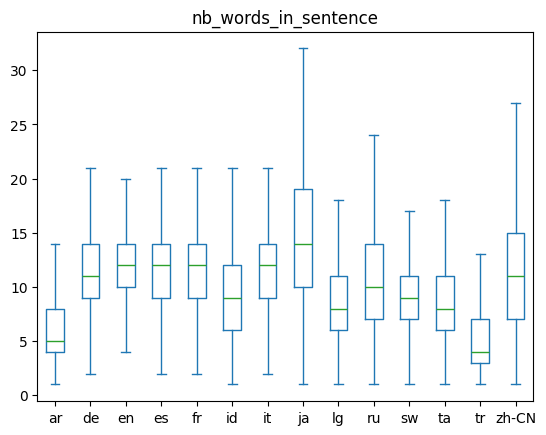

In [ ]:
df_all.plot(kind='box', column=["nb_words_in_sentence"], by="locale", showfliers=False)
#df_all.groupby('locale')['nb_words_in_sentence'].plot(kind='box')
#df_all.loc['locale', 'nb_words_in_sentence'].plot(kind='box')

We notice 2 anormal plots: for 'ta', some sentences are abnormally long. When looking at the file, some sentences indeed contain other data (with up to 60000 words for 1 sentence)
For chinese, MosesTokenizer seems to consider sentences as one single word as long as there are no spaces

11. For each language, find the 17 most frequent words after having removed stop words.

In [26]:
# %pip install nltk

In [27]:
import nltk

In [28]:
from nltk.corpus import stopwords
stop_words = {'en': stopwords.words('english'), 'ar': stopwords.words('arabic'), 'de': stopwords.words('german'), 'es': stopwords.words('spanish'), 'fr': stopwords.words('french'), 'id': stopwords.words('indonesian'), 'it': stopwords.words('italian'), 'ja': [], 'lg': [], 'ru': stopwords.words('russian'), 'sw': stopwords.words('swedish'), 'ta': stopwords.words('tajik'), 'tr': stopwords.words('turkish'), 'zh-CN': stopwords.words('chinese')}

In [29]:
punctuation = ['.', ',', '?', '!', ':', ';', '。', '؟', "'", '"', '、', '@-@', '&quot', '&apos;s', "&apos", '-', '...', '&quot;', 'l&apos', '’', '，', '…', '—', '・', '？', '：', '·', '；', '،', '–', '_', '「', '」', '『', '』', '“', '„', 'l&apos;', 'd&apos;', 'dell&apos;', '&apos;', '《', '》']
nltk.download("punkt")

import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eduss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
df_all['sentence'] = df_all.apply(lambda x: [word for word in x["sentence"] if word not in stop_words[x["locale"]] and word not in punctuation], axis=1)

In [32]:
from nltk.probability import FreqDist
result = df_all.groupby('locale')['sentence'].agg(lambda x: FreqDist([word for sentence in x for word in sentence]).most_common(17))

In [38]:
result = pd.read_pickle("most frequent words.pkl")
result.head()

locale
ar    [(سامي, 1744), (مِنْ, 1359), (فِي, 1201), (مَا...
de    [(wurde, 37952), (wurden, 12650), (zwei, 10068...
en    [(also, 68785), (two, 30293), (one, 29427), (f...
es    [(dos, 8556), (encuentra, 5921), (parte, 5115)...
fr    [(a, 35895), (cette, 23383), (plus, 21926), (d...
Name: sentence, dtype: object

In [76]:
df_common_word_df_list = []
for language in df_all["locale"].unique():
    df_common_word = pd.DataFrame()
    df_common_word[f"word_{language}"], df_common_word[f"count_{language}"] = pd.DataFrame([pair[0] for pair in result[language]]), pd.DataFrame([pair[1] for pair in result[language]])
    df_common_word.set_index(f"word_{language}", inplace=True)
    df_common_word_df_list.append(df_common_word)

In [95]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

display_side_by_side(df_common_word_df_list, df_all["locale"].unique())

C:\Users\eduss\AppData\Local\Temp\ipykernel_9380\2868765072.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,count_ja
word_ja,
の,8279
は,7227
に,5085
を,4453
が,3877
で,3062
た,2769
と,2314
した,2244


In [78]:
from IPython.display import display_html, HTML
from itertools import chain,cycle


def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])
display_side_by_side(*df_common_word_df_list[:2], titles=df_all["locale"].unique()) #we left 3rd empty...

,count_ar
word_ar,
سامي,1744
مِنْ,1359
فِي,1201
مَا,817
لَا,736
توم,720
الله,708
عَلَى,653
ليلى,589


12. Compute, for each language, the size of the available data both in term of duration and in
terms of number of words.

In [ ]:
df_all.groupby('locale').agg(total_duration=('duration[ms]', 'sum'), total_words=('nb_words_in_sentence', 'sum'))

# 2. Measuring the similarity between American presidents speeches

build a DataFrame that associates the name of each president with the vector tf.idf representing his or her speech (you will find the necessary methods in the sklearn library).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

speeches = []
speech_filenames = []

for filename in Path("US_Inaugural_Addresses").rglob("*.txt"):
    with open(filename, 'r', encoding='utf-8') as file:
        speeches.append(file.read())
        speech_filenames.append(filename)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(speeches)

df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df['President'] = [' '.join(str(filename.stem).split('_')[1:]) for filename in speech_filenames]

#df.set_index('President', inplace=True)

df

,000,03,04,05,100,120,125,13,14th,151,...,yourself,yourselves,youth,youthful,zachary,zeal,zealous,zealously,zone,President
0,0.000000,0.017403,0.017766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,lincoln 1865
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,roosevelt franklin 1933
2,0.000000,0.009753,0.009956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,grant 1873
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.013543,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,reagan 1981
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,coolidge 1925
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,bush george w 2001
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,roosevelt franklin 1941
7,0.015043,0.003995,0.004079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,garfield 1881
8,0.000000,0.010445,0.010662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,madison 1813
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,roosevelt theodore 1905


Measure the similarity (e.g. cosine similarity) between all pairs of speeches.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_df = pd.DataFrame(cosine_similarity(df.drop(columns=['President'])), index=df['President'], columns=df['President'])
cosine_sim_df


President,lincoln 1865,roosevelt franklin 1933,grant 1873,reagan 1981,coolidge 1925,bush george w 2001,roosevelt franklin 1941,garfield 1881,madison 1813,roosevelt theodore 1905,...,mckinley 1901,taylor 1849,truman 1949,obama 2009,roosevelt franklin 1937,obama 2013,harding 1921,nixon 1973,madison 1809,van buren 1837
President,,,,,,,,,,,,,,,,,,,,,
lincoln 1865,1.000000,0.677880,0.710054,0.658276,0.716399,0.547790,0.688441,0.741876,0.694170,0.646343,...,0.727484,0.716323,0.665410,0.664527,0.646408,0.623903,0.685560,0.627630,0.701930,0.729808
roosevelt franklin 1933,0.677880,1.000000,0.802462,0.782564,0.853383,0.686726,0.809826,0.839146,0.781916,0.776533,...,0.827092,0.799042,0.796654,0.782789,0.807348,0.739659,0.819084,0.735666,0.798076,0.843349
grant 1873,0.710054,0.802462,1.000000,0.755976,0.828320,0.644011,0.777518,0.853898,0.788368,0.737681,...,0.835298,0.829434,0.766651,0.743783,0.768136,0.696381,0.787970,0.705153,0.826443,0.853256
reagan 1981,0.658276,0.782564,0.755976,1.000000,0.832344,0.780541,0.772213,0.772277,0.737056,0.778230,...,0.788812,0.754909,0.802484,0.840963,0.793037,0.818832,0.820097,0.782213,0.743661,0.813345
coolidge 1925,0.716399,0.853383,0.828320,0.832344,1.000000,0.757531,0.842017,0.867594,0.813732,0.824012,...,0.867714,0.832457,0.846802,0.835411,0.842299,0.803215,0.871176,0.786087,0.828953,0.881167
bush george w 2001,0.547790,0.686726,0.644011,0.780541,0.757531,1.000000,0.692881,0.651454,0.638876,0.712568,...,0.683110,0.652760,0.729252,0.797817,0.718007,0.795936,0.766042,0.722289,0.631978,0.716780
roosevelt franklin 1941,0.688441,0.809826,0.777518,0.772213,0.842017,0.692881,1.000000,0.835569,0.774591,0.769336,...,0.818628,0.775144,0.787486,0.783587,0.806502,0.739094,0.805594,0.734028,0.783805,0.824397
garfield 1881,0.741876,0.839146,0.853898,0.772277,0.867594,0.651454,0.835569,1.000000,0.836403,0.777768,...,0.899226,0.858520,0.791716,0.777582,0.803192,0.720766,0.824725,0.712178,0.853506,0.876143
madison 1813,0.694170,0.781916,0.788368,0.737056,0.813732,0.638876,0.774591,0.836403,1.000000,0.729661,...,0.825379,0.799299,0.744576,0.740751,0.754922,0.688551,0.776875,0.675428,0.814806,0.833746


Perform a hierarchical clustering and obtain the plot.

In [ ]:
# %pip install seaborn

1510.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


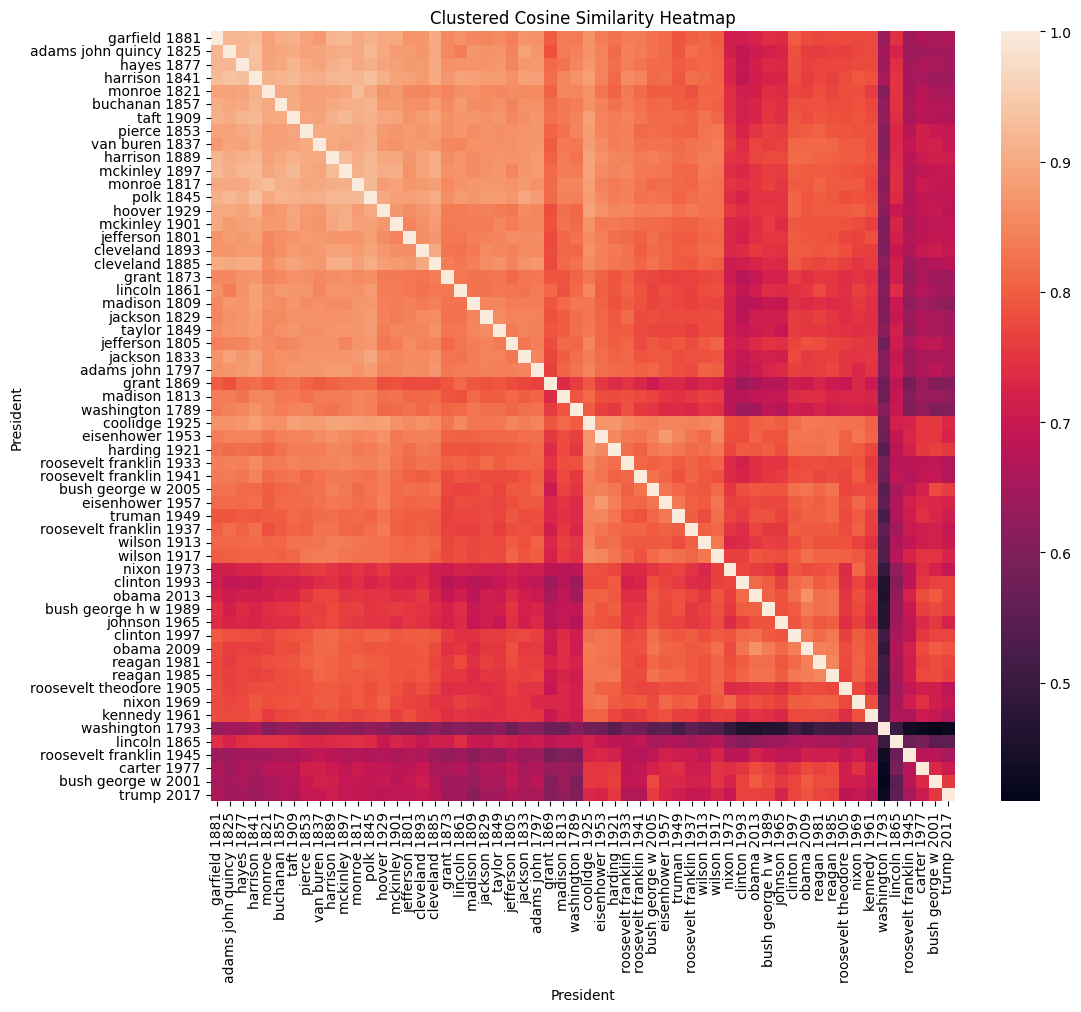

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

order = sch.dendrogram(sch.linkage(cosine_sim_df, method='ward'), no_plot=True)['leaves']
clustered_cosine_sim_df = cosine_sim_df.iloc[order, order]


plt.figure(figsize=(12, 10))
sns.heatmap(clustered_cosine_sim_df, xticklabels=True, yticklabels=True)

plt.title('Clustered Cosine Similarity Heatmap')
plt.xticks(rotation=90)
plt.show()

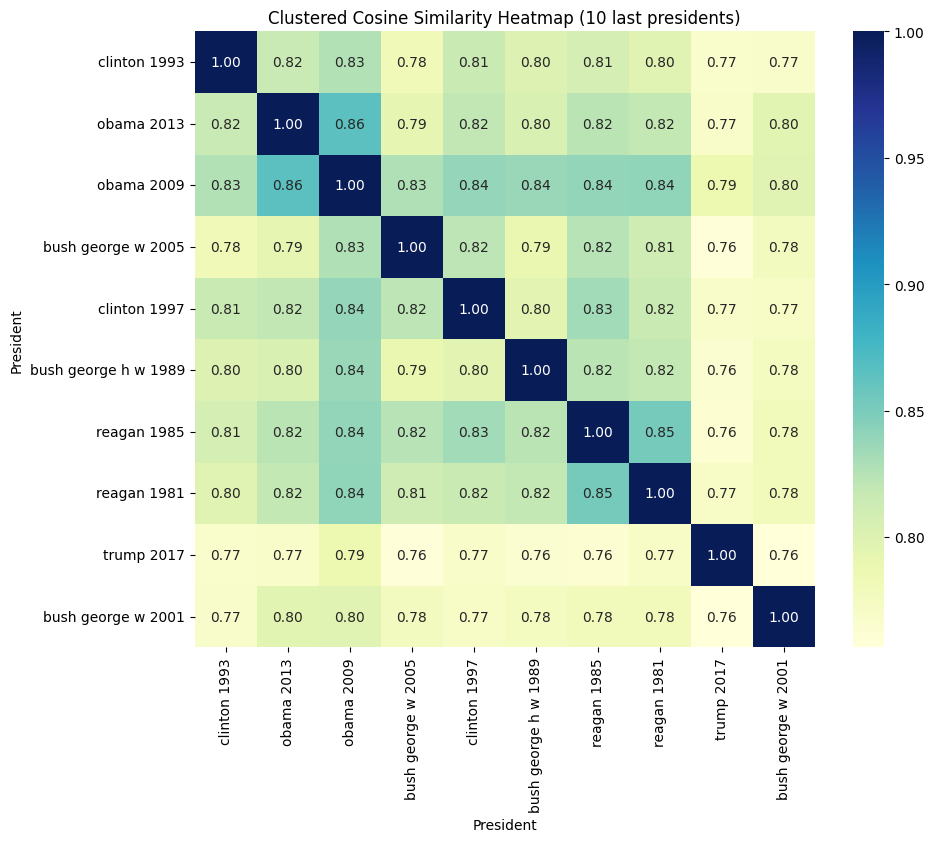

In [ ]:
cosine_sim_df['election year'] = cosine_sim_df.index.str.split().str[-1].astype(int)

sorted_cosine_sim_df = cosine_sim_df.sort_values(by='election year', ascending=False)
recent_presidents = sorted_cosine_sim_df.index[:10]
recent_cosine_sim_df = sorted_cosine_sim_df.loc[recent_presidents, recent_presidents]

order = sch.dendrogram(sch.linkage(recent_cosine_sim_df, method='ward'), no_plot=True)['leaves']


plt.figure(figsize=(10, 8))
sns.heatmap(recent_cosine_sim_df.iloc[order, order], annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=True, yticklabels=True)

plt.title('Clustered Cosine Similarity Heatmap (10 last presidents)')
plt.xticks(rotation=90)
plt.show()